1. Linier Regression
Simple Linier Regression, Y = a + bx
Regresi linear adalah teknik analisis data yang memprediksi nilai data yang tidak diketahui dengan menggunakan nilai data lain yang terkait dan diketahui. Secara matematis memodelkan variabel yang tidak diketahui atau tergantung dan variabel yang dikenal atau independen sebagai persamaan linier

Regresi linier sederhana didefinisikan oleh fungsi linier:

Y= a*X + b + ε

a and b adalah dua konstanta yang tidak diketahui dan mewakili kemiringan regresi, sedangkan ε (epsilon) adalah istilah kesalahannya.

Regresi linier sederhana dapat digunakan untuk mencontoh hubungan antara dua variabel, seperti:

Curah hujan dan hasil panen
Usia dan tinggi badan pada anak
Suhu dan ekspansi logam merkuri dalam termometer

In [ ]:
pip install scikit-learn
#intersting prom spark
#from pyspark.sql.functions import col, sum

# null_counts = df.agg(
#     *[sum(col(c).isNull().cast("int")).alias(c + "_nulls") for c in df.columns]
# ).collect()[0].asDict()

# Show the result
# null_counts

In [ ]:
# Definisi library python
import pandas as pd
import numpy as np
import sklearn.model_selection as ms
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# Membaca file data csv
df=pd.read_csv('/content/drive/MyDrive/Bensin.csv')
df.head(10)

,Liter,Kilometer
0,20,142.0
1,25,177.0
2,20,144.0
3,30,203.0
4,40,273.0
5,35,239.0
6,30,201.0
7,30,195.0
8,25,175.0
9,25,169.0


In [ ]:
# Menampilkan daftar fitur
features = df.columns.tolist()
print("Daftar Fitur:")
for feature in features:
    print(feature)

Daftar Fitur:
Liter
Kilometer


In [ ]:
# Tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Liter      65 non-null     int64  
 1   Kilometer  65 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [ ]:
# Total null data
print(df.isnull().sum())
print('shape:', df.shape)

Liter        0
Kilometer    0
dtype: int64
shape: (65, 2)


In [ ]:
# Total null data
print(df.isna().sum())
print('shape:', df.shape)

Liter        0
Kilometer    0
dtype: int64
shape: (65, 2)


In [ ]:
# Statistik deskriptif data
df.describe()

,Liter,Kilometer
count,65.000000,65.000000
mean,26.446154,181.064615
std,7.424686,49.741763
min,6.000000,32.000000
25%,23.000000,144.000000
50%,25.000000,177.000000
75%,30.000000,212.000000
max,45.000000,278.000000


In [ ]:
# Membagi data train dan test (80% data train, 20% data test)
liter = df['Liter'].values.reshape(-1, 1)  # Reshape to 2D array with a single feature
kilometer = df[('Kilometer')].values.reshape(-1, 1)
X_train,X_test,y_train,y_test=ms.train_test_split(liter,kilometer,test_size=0.2,random_state=0)
print(X_train.size,X_test.size)

52 13


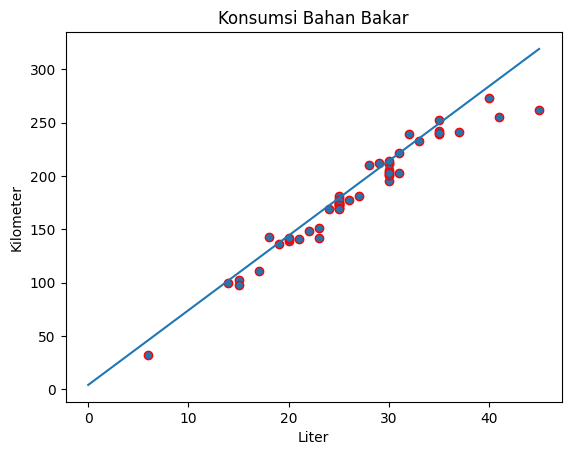

In [ ]:
# Plot scatter data
plt.scatter(X_train,y_train,edgecolors='r')
plt.xlabel('Liter')
plt.ylabel('Kilometer')
plt.title('Konsumsi Bahan Bakar')
x1=np.linspace(0,45)
y1=4+7*x1
plt.plot(x1,y1)
plt.show()

In [ ]:
model1 =lm.LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Mencari nilai koefisien regresi
model1.coef_

array([[6.45829591]])

In [ ]:
# Mencari nilai intercept regresi
model1.intercept_

array([10.64122249])

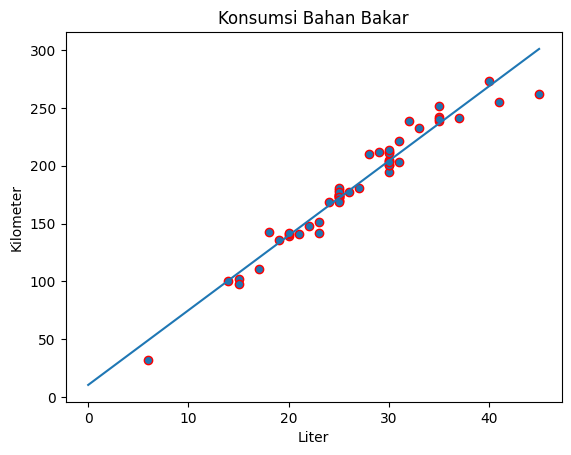

In [ ]:
plt.scatter(X_train,y_train,edgecolors='r')
plt.xlabel('Liter')
plt.ylabel('Kilometer')
plt.title('Konsumsi Bahan Bakar')
x1=np.linspace(0,45)
y1=10.64+6.45*x1
plt.plot(x1,y1)
plt.show()

In [ ]:
# Make predictions on the test data
y_pred = model1.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Print MSE with 2 digits behind the comma
print("Mean Squared Error:", round(mse, 2))

Mean Squared Error: 63.86


In [ ]:
# Melakukan prediksi data jarak
prediksi = model1.predict(X_test)
print(prediksi)

[[107.51566118]
 [172.0986203 ]
 [172.0986203 ]
 [159.18202848]
 [139.80714074]
 [268.97305898]
 [204.39009986]
 [236.68157942]
 [ 75.22418162]
 [243.13987534]
 [172.0986203 ]
 [139.80714074]
 [191.47350804]]


In [ ]:
print(y_test)

[[102. ]
 [167. ]
 [177. ]
 [142. ]
 [144. ]
 [278. ]
 [211. ]
 [241. ]
 [ 65. ]
 [241. ]
 [166.2]
 [144. ]
 [180. ]]


In [ ]:
# Membuat dataframe untuk menampilkan nilai aktual dan prediksi jarak
result_df = pd.DataFrame({'Actual Kilometer': [f"{x:.2f}" for x in y_test_1d], 'Predicted Kilometer': [f"{x:.2f}" for x in prediksi_1d]})
print(result_df)

   Actual Kilometer Predicted Kilometer
0            102.00              107.52
1            167.00              172.10
2            177.00              172.10
3            142.00              159.18
4            144.00              139.81
5            278.00              268.97
6            211.00              204.39
7            241.00              236.68
8             65.00               75.22
9            241.00              243.14
10           166.20              172.10
11           144.00              139.81
12           180.00              191.47


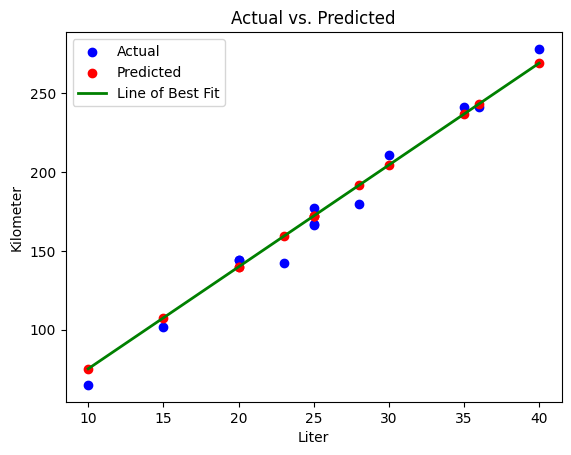

In [ ]:
# Sort nilai X_test dan y_pred berdasarkan nilai X_test
sorted_indexes = X_test[:, 0].argsort()
X_test_sorted = X_test[sorted_indexes]
y_pred_sorted = y_pred[sorted_indexes]

# Plot nilai aktual dan hasil prediksi
plt.scatter(X_test, y_test, color='blue', label='Actual')  # Nilai aktual dalam warna biru
plt.scatter(X_test, y_pred, color='red', label='Predicted')  # Hasil prediksi dalam warna merah
plt.plot(X_test_sorted, y_pred_sorted, color='green', linewidth=2, label='Line of Best Fit')  # Garis menghubungkan setiap titik
plt.xlabel('Liter')
plt.ylabel('Kilometer')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

**2. Multiple Regression** y = a +b1x1+b2x2+b3x3+...+bnxn

Dalam analisis regresi linier berganda, set data berisi satu variabel dependen dan beberapa variabel independen. Fungsi garis regresi linier berubah untuk memasukkan lebih banyak faktor sebagai berikut:

Y= a+b1X1 + b2X2+…… bnXn+ ε

Contoh regresi linier berganda : curah hujan, suhu, dan penggunaan pupuk pada hasil panen,
Pertumbuhan upah dan inflasi pada tarif pinjaman rumah, dll

In [ ]:
# Membaca file data csv
df3=pd.read_csv('/content/drive/MyDrive/bensin2.csv')
df3.head(10)

,Liter,Penumpang,Bagasi,Kecepatan,RPM,Suhu,Kilometer
0,20,1,0,42,3000,29,142
1,25,2,15,50,4000,36,177
2,20,4,10,50,3000,24,144
3,30,5,25,50,3000,18,203
4,40,1,40,50,3200,30,273
5,35,1,0,50,2900,31,239
6,30,2,30,50,3000,30,201
7,30,5,60,50,3500,30,195
8,25,1,0,50,3000,29,175
9,25,4,0,50,3000,30,169


In [ ]:
df3.corr(method='pearson')

<ipython-input-93-f4a955e39235>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3.corr(method='pearson')


,Liter,Penumpang,Bagasi,Kecepatan,Suhu,Kilometer
Liter,1.000000,-0.087997,0.097560,0.109370,0.079470,0.700815
Penumpang,-0.087997,1.000000,0.081542,0.111942,-0.039954,-0.034175
Bagasi,0.097560,0.081542,1.000000,0.082096,-0.049363,-0.023318
Kecepatan,0.109370,0.111942,0.082096,1.000000,-0.009752,0.042819
Suhu,0.079470,-0.039954,-0.049363,-0.009752,1.000000,0.136657
Kilometer,0.700815,-0.034175,-0.023318,0.042819,0.136657,1.000000


In [ ]:
# Membagi data train dan test (80% data train, 20% data test)
X = df3[['Liter','Penumpang','Suhu','Kecepatan']]
#liter = df['Liter'].values.reshape(-1, 1)  # Reshape to 2D array with a single feature
y = df3[['Kilometer']]
X_train,X_test,y_train,y_test=ms.train_test_split(X,y,test_size=0.1,random_state=0)
print(X_train.size,X_test.size)

232 28


In [ ]:
# Apply feature scaling to the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model2 = lm.LinearRegression()
model2.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
print('Intercept=', model2.intercept_)
print('Slope=', model2.coef_)

Intercept= [164.20689655]
Slope= [[48.14267704  4.75524918  8.06287989 -3.34403996]]


Persamaan Regresi Linier Berganda : y = 164.206 + 48.142x1 + 4.7552x2 + 8.06x3 - 3.344x4

In [ ]:
# Reshape data1 to a 2D array for prediction
data1 = np.array([[30, 2, 10, 50]])
data1_scaled = scaler.transform(data1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
hasil = model2.predict(data1_scaled)
print(hasil)

[[138.07882573]]


In [ ]:
# Make predictions on the test set and reshape for DataFrame
prediksi = model2.predict(X_test_scaled)
y_test_1d = y_test.to_numpy().reshape(-1)
prediksi_1d = prediksi.reshape(-1)

In [ ]:
# Membuat dataframe untuk menampilkan nilai aktual dan prediksi jarak
result_df = pd.DataFrame({'Actual Kilometer': y_test_1d.round(2), 'Predicted Kilometer': prediksi_1d.round(2)})
print(result_df)

   Actual Kilometer  Predicted Kilometer
0               102                66.96
1               167               136.74
2               177               152.01
3               142               141.38
4               144               108.95
5               278               249.58
6               211               174.35


In [ ]:
# Make predictions on the test set
prediksi = model2.predict(X_test_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, prediksi)
print("Mean Squared Error:", mse)

Mean Squared Error: 878.2030942139972


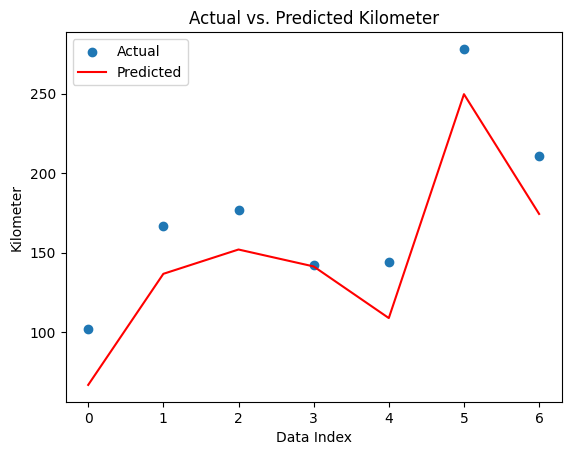

In [ ]:
# Plotting the actual and predicted values
plt.scatter(result_df.index, result_df['Actual Kilometer'], label='Actual', marker='o')
plt.plot(result_df.index, result_df['Predicted Kilometer'], label='Predicted', color='r')
plt.xlabel('Data Index')
plt.ylabel('Kilometer')
plt.title('Actual vs. Predicted Kilometer')
plt.legend()
plt.show()